<a href="https://colab.research.google.com/github/fikritrader/Machine-Learning-For-Analytics/blob/master/Portfolio_Returns_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Portfolio Returns using Python**
Financial Analytics – Introduction

On October 2, 2019 by Jyoti Dixit


Portfolio Returns using Python
Financial Analytics – Introduction
Hi MLEnthusiasts! Here’s the part 3 of our financial analytics series. Today, we will be learning how to calculate the cumulative return of the portfolio of securities, given the returns of individual stocks, using python. You may like to go through part 1 of Financial Analytics series and part 2 of Financial Analytics series, if you’re new to this field.

Financial Analytics – The Theory
Before jumping on code, let’s first understand the theory behind calculating the cumulative return of portfolio of securities.

To calculate this, we need to know the expected returns of the individual assets and also the weight associated with each asset.

We get the cumulative return by multiplying the return of each individual asset with its associated weight and then summing these up. Thus, the cumulative return is the weighted average of individual returns.

Suppose, we have three assets A1, A2 and A3. The weights associated with these assets are w1, w2 and w3. Also, the returns associated with these assets are r1, r2 and r3. Let the cumulative return be represented as R. Thus, R is given by

R = w1r1+w2r2+w3r3

If there are N assets, the same R is given by

R = Σwnrn    

where n varies from 1 to N.
Financial Analytics – The Code
Okay, enough of the theory! Let’s now jump on doing this using python!

## **The first step is to import the libraries.**

In [1]:
#Numpy is the package for scientific computing with python. Array computations are made very easy by using this package.
import numpy as np

#For data manipulation and data analysis. Manipulation of dataframes is made very easy using this library.
import pandas as pd

#Functions from pandas_datareader.data and pandas_datareader.wb extract data from various Internet sources into a pandas DataFrame.
from pandas_datareader import data as dr

#Using pyplot, we can get interactive plots and generate programmatic plots
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


Next, we will make a list of assets – ‘PG'(Procter and Gamble), ‘MSFT'(Microsoft) and ‘GE'(General Electric), save it in a variable ‘assets’. Make a new blank dataframe, get it saved in assetsAdjClose and then bring the ‘Adj Close’ column of all these assets in this dataframe. We will fetch data from yahoo finance.

In [0]:
assets = ['PG', 'MSFT', 'GE']
assetsAdjClose = pd.DataFrame()
for a in assets:
    assetsAdjClose[a] = dr.DataReader(a, data_source='yahoo', start='1995-1-1')['Adj Close']

In [3]:
assetsAdjClose.info()     #Checking what's there in this dataframe!

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6390 entries, 1995-01-03 to 2020-05-19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      6390 non-null   float64
 1   MSFT    6390 non-null   float64
 2   GE      6390 non-null   float64
dtypes: float64(3)
memory usage: 199.7 KB


In [4]:
assetsAdjClose.head()    #Checking first 5 rows of this dataframe

,PG,MSFT,GE
Date,,,
1995-01-03,6.320252,2.413537,2.729230
1995-01-04,6.269589,2.431082,2.729230
1995-01-05,6.180927,2.390982,2.735919
1995-01-06,6.193593,2.431082,2.722540
1995-01-09,6.168259,2.416045,2.695783


In [5]:
assetsAdjClose.tail()     #Checking last 5 rows of this dataframe

,PG,MSFT,GE
Date,,,
2020-05-13,113.919998,179.750000,5.79
2020-05-14,113.809998,180.529999,5.70
2020-05-15,114.610001,183.160004,5.49
2020-05-18,116.209999,184.910004,6.27
2020-05-19,112.440002,183.630005,6.21


## **Normalization to 100**
We do normalization to keep the base of all the assets the same. This helps us in comparison. Here,
Po is the first row (data corresponding to the oldest date) of the dataframe and  Pt is the next row.

![Texte alternatif…](https://i1.wp.com/mlforanalytics.com/wp-content/uploads/2019/10/normalization.png?resize=69%2C53&ssl=1)

In [6]:
assetsAdjClose.iloc[0]       #Gives the first row figures of the dataframe.

PG      6.320252
MSFT    2.413537
GE      2.729230
Name: 1995-01-03 00:00:00, dtype: float64

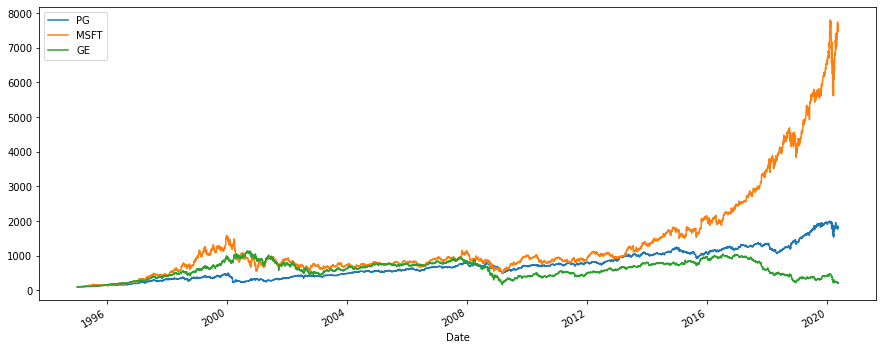

In [7]:
(assetsAdjClose/assetsAdjClose.iloc[0]*100).plot(figsize = (15, 6)); #Normalizing the dataframe
plt.show()  #Plot the line chart of all the securities - data is normalized.

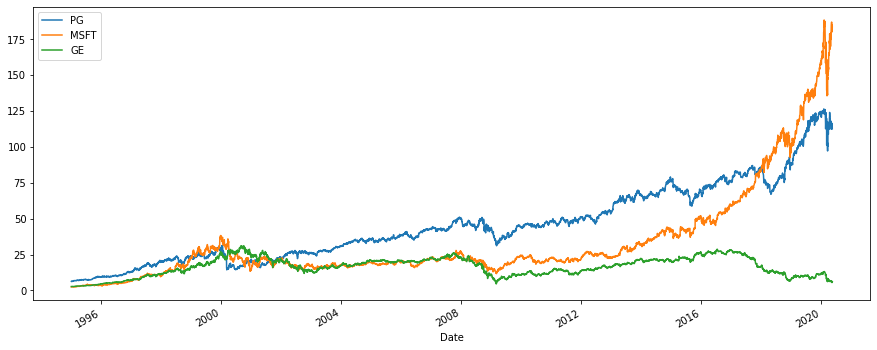

In [8]:
assetsAdjClose.plot(figsize=(15,6))
plt.show()     #line chart of data without normalization

## **Calculating the Return of a Portfolio of Securities**

![Texte alternatif…](https://i2.wp.com/mlforanalytics.com/wp-content/uploads/2019/09/return2.png?resize=149%2C54&ssl=1)

In [9]:
#pandas.Dataframe.shift(# lags)
#Using shift(1), we can get the row just above the present row. Here, # lags is 1.
returns = (assetsAdjClose/assetsAdjClose.shift(1)) - 1       #calculating simple rate of return
returns.head()       #displaying first 5 rows of returns dataframe

,PG,MSFT,GE
Date,,,
1995-01-03,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.000000
1995-01-05,-0.014142,-0.016495,0.002451
1995-01-06,0.002049,0.016771,-0.004890
1995-01-09,-0.004090,-0.006185,-0.009828


## **Case 1: When the weights of all the assets are same.**

In [0]:
weights = np.array([0.33, 0.33, 0.33]) #Note: the sum of the weights should be equal to 1.

In [11]:
np.dot(returns, weights)           #This calculates the dot product of weights matrix and returns dataframe.
# This dot product is the weighted returns dataframe, the mean of each row of which, if we find will give us daily average simple return.

array([        nan, -0.0002464 , -0.0093013 , ..., -0.00503071,
        0.05464516, -0.01614785])

Annual Average Returns are given by computing the mean of the simple rate of return series and then multiplying the value by 250 since 250 days exist in a business day system.

In [12]:
annualReturns = returns.mean()*250
annualReturns #This gives the average annual return of the individual asset.

PG      0.138642
MSFT    0.219644
GE      0.082012
dtype: float64

In [13]:
np.dot(annualReturns, weights)   # This gives the cumulative annual average return.  Refer formula given in the theory section

0.14529841513427985

Cumulative annual return % is given by:

In [14]:
portfolioSameWeights = str(round(np.dot(annualReturns, weights)*100, 2)) + ' %'
print(portfolioSameWeights)

14.53 %


# When weights are **different**

In [0]:
weightsDifferent = np.array([0.25, 0.5, 0.25])  #Note: the sum of the weights should be equal to 1.

In [16]:
np.dot(annualReturns, weightsDifferent)

0.16498558991916348

In [17]:
portfolioDifferentWeights = str(round(np.dot(annualReturns, weightsDifferent)*100, 5)) + ' %'
print("The cumulative return for portfolio with same weights is ", portfolioSameWeights)
print("The cumulative return for portfolio with different weights is ", portfolioDifferentWeights)

The cumulative return for portfolio with same weights is  14.53 %
The cumulative return for portfolio with different weights is  16.49856 %


Link to Financial Analytics – Part 4.

Also, please check out our YouTube channel and like, comment, share and subscribe.

source: https://mlforanalytics.com/2019/10/02/financial-analytics-portfolio-returns-using-python/